# **Importing the modules**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

import warnings
warnings.filterwarnings("ignore")

# **Exploratory Data Analysis**

In [2]:
data = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
data["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [8]:
data["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [9]:
data[['gender','diabetes']].groupby(['gender'], as_index=True).mean().sort_values(by='diabetes',ascending=False)

,diabetes
gender,
Male,0.097490
Female,0.076189
Other,0.000000


In [10]:
data['diabetes'].quantile([0.9, 0.91, 0.92, 1.0])

0.90    0.0
0.91    0.0
0.92    1.0
1.00    1.0
Name: diabetes, dtype: float64

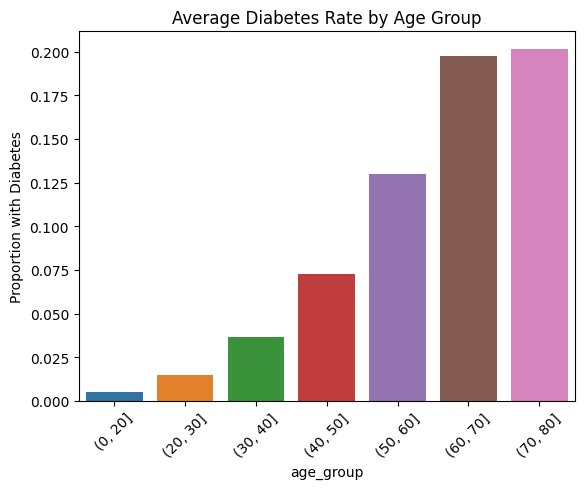

In [11]:
data['age_group'] = pd.cut(data['age'], bins=[0,20,30,40,50,60,70,80])
grouped = data.groupby('age_group')['diabetes'].mean().reset_index()

sns.barplot(x='age_group', y='diabetes', data=grouped)
plt.title("Average Diabetes Rate by Age Group")
plt.ylabel("Proportion with Diabetes")
plt.xticks(rotation=45)
plt.show()

In [12]:
data['age_category'] = pd.cut(
    data['age'],
    bins=[0, 30, 50, data['age'].max()],  # 0–30, 30–50, 50+
    labels=['0–30', '30–50', '50+'],
    include_lowest=True
)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  object  
 1   age                  100000 non-null  float64 
 2   hypertension         100000 non-null  int64   
 3   heart_disease        100000 non-null  int64   
 4   smoking_history      100000 non-null  object  
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  int64   
 8   diabetes             100000 non-null  int64   
 9   age_group            100000 non-null  category
 10  age_category         100000 non-null  category
dtypes: category(2), float64(3), int64(4), object(2)
memory usage: 7.1+ MB


In [14]:
data = data.drop(['age', 'age_group'], axis = 1)

In [15]:
data.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_category
0,Female,0,1,never,25.19,6.6,140,0,50+
1,Female,0,0,No Info,27.32,6.6,80,0,50+
2,Male,0,0,never,27.32,5.7,158,0,0–30
3,Female,0,0,current,23.45,5.0,155,0,30–50
4,Male,1,1,current,20.14,4.8,155,0,50+


In [16]:
data[['smoking_history','diabetes']].groupby(['smoking_history'], as_index=True).mean().sort_values(by='diabetes',ascending=False)

,diabetes
smoking_history,
former,0.170017
ever,0.117882
not current,0.107027
current,0.102089
never,0.095341
No Info,0.040596


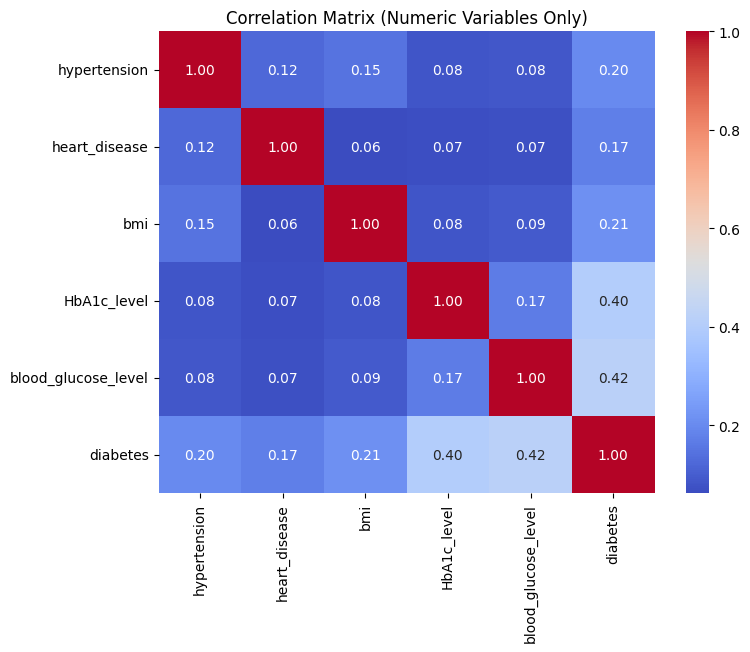

In [17]:
corr = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Variables Only)")
plt.show()

In [18]:
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])
data['age_category'] = le.fit_transform(data['age_category'])

In [19]:
data.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_category
0,0,0,1,4,25.19,6.6,140,0,2
1,0,0,0,0,27.32,6.6,80,0,2
2,1,0,0,4,27.32,5.7,158,0,0
3,0,0,0,1,23.45,5.0,155,0,1
4,1,1,1,1,20.14,4.8,155,0,2


In [20]:
y = data['diabetes']
X = data.drop(columns=['diabetes'])

# Optional: add constant term for intercept
X = sm.add_constant(X)

In [21]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.114723
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99991
Method:                           MLE   Df Model:                            8
Date:                Wed, 08 Oct 2025   Pseudo R-squ.:                  0.6055
Time:                        14:04:10   Log-Likelihood:                -11472.
converged:                       True   LL-Null:                       -29081.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -26.6596      0.282    -94.472      0.000     -27.213     -26.106
g

In [22]:
significant_features = result.pvalues[result.pvalues < 0.05].index.tolist()
print("Significant features:", significant_features)

Significant features: ['const', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'age_category']


In [23]:
significant_features.remove('const')

# **Model training**

In [24]:
# Features and target
X = data[significant_features]
y = data['diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test)

# **Metrics**

In [27]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision
prec = precision_score(y_test, y_pred)

# Recall
rec = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

Accuracy: 0.95375
Precision: 0.7915726109857035
Recall: 0.6188235294117647
F1-score: 0.694618686034995


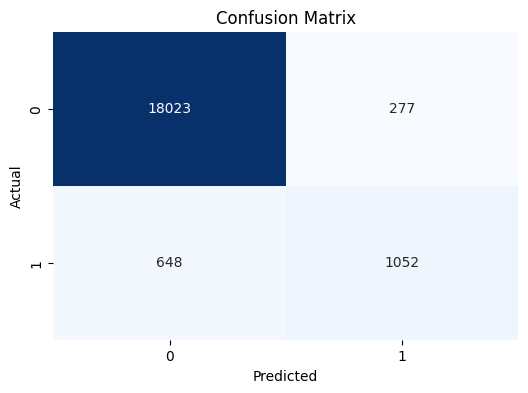

In [28]:
# Plot using heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18300
           1       0.79      0.62      0.69      1700

    accuracy                           0.95     20000
   macro avg       0.88      0.80      0.83     20000
weighted avg       0.95      0.95      0.95     20000



# **Exporting the model**

In [30]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [31]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred_loaded = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred_loaded))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18300
           1       0.79      0.62      0.69      1700

    accuracy                           0.95     20000
   macro avg       0.88      0.80      0.83     20000
weighted avg       0.95      0.95      0.95     20000

